## data loader

In [22]:
process = "lu.C.16_abnormal"
duration = "100ms"

DATASET = "/home/sx/MPI_profile/"+ process + "/" + duration + "/node_feature.csv"
TOPOLOGY = "/home/sx/MPI_profile/"+ process + "/" + duration + "/graph_edge"

# DATASET = "/home/sx/MPI_profile/lu.B.x/250000000/node_feature.csv"
# TOPOLOGY = "/home/sx/MPI_profile/lu.B.x/250000000/graph_edge"


def data_load(): 
    data = pd.read_csv(DATASET, header=[0,1])
    data.columns.names = ['metric', 'host']
    tempm = data.stack()
    tempm = (tempm-tempm.mean())/(tempm.std())
    metric = tempm.unstack().swaplevel('metric','host',axis=1).stack().unstack()


    edge_data = pd.read_csv(TOPOLOGY, header=0)
    # edge_data = edge_data.groupby(['ts_id','src', 'dst']).agg({'commsize': 'sum'}).reset_index()
    edge_data = edge_data.groupby(['src', 'dst']).agg({'commsize': 'sum'}).reset_index()

    edge_index = edge_data[['src', 'dst']].values.T.tolist()
    edge_weight = edge_data['commsize'].values.tolist()

    # print("metric:")
    # print(metric)

    print("Edge Index:")
    print(edge_index)

    # print("Edge Weight:")
    # print(edge_weight)

    return metric, edge_index

from graphlstm_vae_ad import GraphLSTM_VAE_AD
import pandas as pd
import numpy as np

metric, edge_index = data_load()


Edge Index:
[[0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15], [1, 4, 0, 2, 5, 1, 3, 6, 2, 7, 0, 5, 8, 1, 4, 6, 9, 2, 5, 7, 10, 3, 6, 11, 4, 9, 12, 5, 8, 10, 13, 6, 9, 11, 14, 7, 10, 15, 8, 13, 9, 12, 14, 10, 13, 15, 11, 14]]


## 加载数据与模型

In [23]:
print(len(metric))

724


In [24]:
# model = GraphLSTM_VAE_AD(sequence_length=120, gpu=1)
process = "luC16"
model = GraphLSTM_VAE_AD(name=process + "_" + duration, gpu=1, sequence_length=30, hidden_dim=8, batch_size=32, lr=1e-3, num_epochs=2000)

## 训练模型

In [5]:
model.fit(metric, 16, edge_index, log_step=5, patience=20)

 13%|█▎        | 2/15 [00:02<00:15,  1.20s/it]


KeyboardInterrupt: 

In [25]:
model.load(16, metric.shape[1])

In [26]:
scores_sum = []
scores_max = []
scores = []
outputs = []
scores, scores_sum, scores_max, outputs = model.predict(metric, 16, edge_index, 1)

  0%|          | 0/22 [00:00<?, ?it/s]

100%|██████████| 22/22 [00:12<00:00,  1.75it/s]

695
(30,)
695
(30, 16)


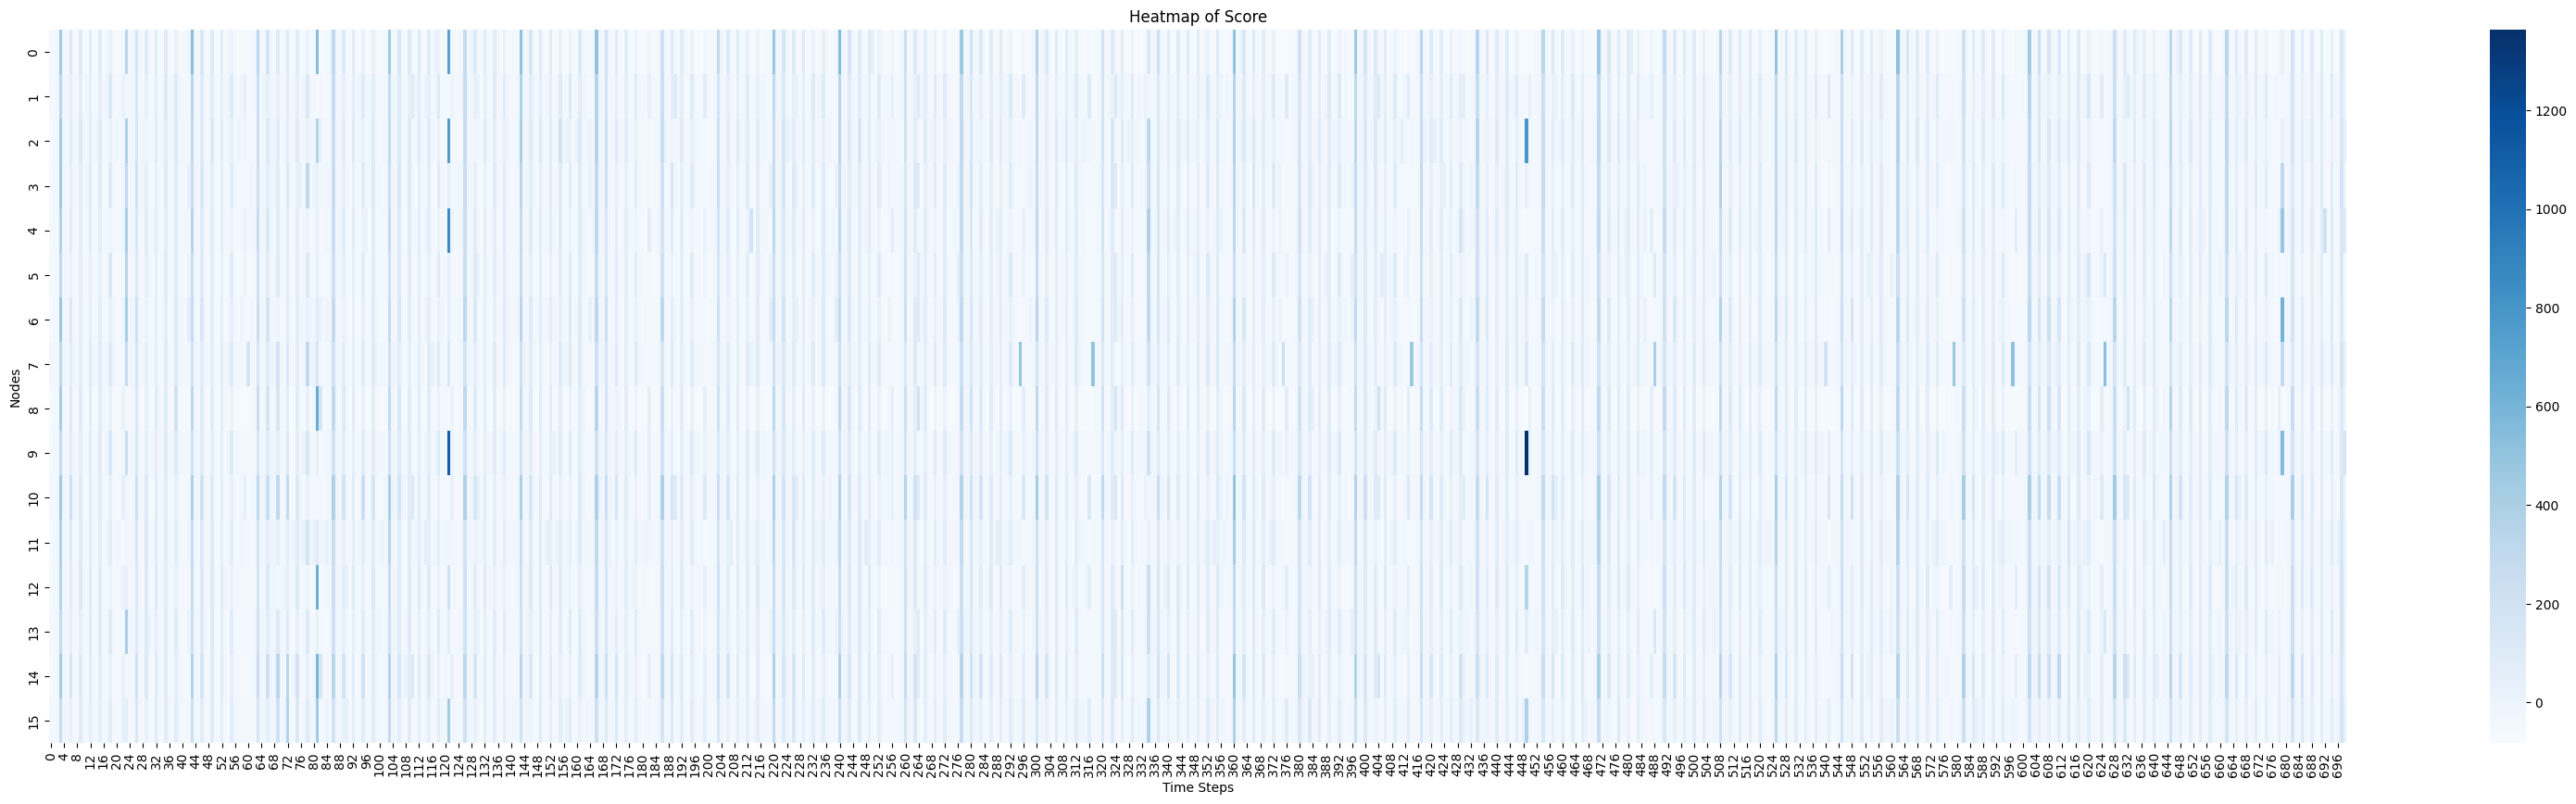

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 scores_sum 是形状为 (699, 16) 的数组
# scores_sum = np.random.rand(699, 16)
scores = scores.T
# scores = scores[:, :300]
# 设置绘图尺寸
plt.figure(figsize=(40, 10))

# 使用 seaborn 绘制热力图
# sns.heatmap(scores, cmap='Blues', cbar=True, vmin=-100, vmax=300)
sns.heatmap(scores, cmap='Blues', cbar=True)

# 设置标题和标签
plt.title('Heatmap of Score')
plt.xlabel('Time Steps')
plt.ylabel('Nodes')

# 显示热力图
plt.show()

In [26]:
mylog = open('output.txt', mode = 'a',encoding='utf-8')
for i in range(len(outputs)):
    print(outputs[i], file=mylog)
mylog.close()
# df_outputs = pd.DataFrame(data=outputs)
# df_outputs.to_csv('outputs.csv')
# print(outputs)

In [28]:
mylog = open('scores_max.txt', mode = 'a',encoding='utf-8')
for i in range(len(scores_max)):
    print(scores_max[i], file=mylog)
mylog.close()